# **Bank Churn Prediction Assignment**

## **Context and problem**

As it is important for businesses that provide services to customers, espacially the banks, to worry about problem of 'Churn', we want to understand which aspects of the service influence a customer's decision to leave and join another service provider. This way, Management could concentrate efforts on the improvement of service, keeping in mind these priorities.

## **Objective**

- Build a neural network-based classifier to help determine whether customers will leave or not in the next 6 months.

## **Data Description**

- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer 
- CreditScore: It defines the credit history of the customer.  
- Geography: A customer’s location    
- Gender: It defines the Gender of the customer   
- Age: Age of the customer     
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary 
- isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take 
two values 
                    
- 0=No ( Customer did not leave the bank )
- 1=Yes ( Customer left the bank )

## **Mounting the Drive**

## **Importing Libraries**

In [189]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
#To import different metrics 
from sklearn import metrics
import sklearn 
from tensorflow.keras import backend
# importing different functions to build models
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import optimizers
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

# **1) Reading Dataset and Feature Elimination**

## **Loading the data**

In [190]:
# data = pd.read_csv('/content/drive/MyDrive/Churn.csv')
data = pd.read_csv('Churn.csv')
# Print the first five rows of the data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Overview of the data**

In [191]:
# printing information about the shape of the dataset
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 10000 rows and 14 columns.


In [192]:
#Checking the shape of the data
data.shape

(10000, 14)

In [193]:
#Information about the data
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- The dataset has 11 numerical variables (9 of dtypes integers and 2 of dtypes floats) and 3 categorical variables

In [194]:
# Let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

There is no missing value in the data

In [195]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

There is no duplicate value in the data

## **Let's view the statistical summary of the numerical columns in the data**

In [196]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Outside of the RowNumber, CustomerId (an Unique ID number), IsActiveMember, HasCrCard  and the Exited variable, we can considere there are only six numerical columns in the dataset, even if we have a maximum of 4 number of products that a customer has purchased through the bank.

* The column CreditScore seems to be a little bit normal distributed as the mean and the median are close to each other, even if the median looks slightly important than the mean (left skew)

* There is a little right skew in the Age and 75% of customers of the bank are less than 45 years old. With a maximum at 92, it seems to have some outliers in the column Age

* The column Tenure looks normal distributed as the median and the mean are very close to each other

* The columns Balance (Account balance) is left skewed

* NumOfProducts (the number of products that a customer has purchased through the bank) is right skewed

* EstimatedSalary (Estimated salary) looks like it is normal distributed

## **Lets us look at different levels in categorical variables**

In [197]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [198]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith          32
Scott          29
Martin         29
Walker         28
Brown          26
               ..
Tinline         1
Fitzpatrick     1
Arkwookerum     1
Colman          1
Jobson          1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


- There are 2 Genders (Male and Female, with slightly more men than women)
- The customers of the bank are from 3 countries : France, Germany and Spain
- There are many distinct values (2932) in Surname column. Unfortunately we cannot extract any relevant information from to build our outcoming models. So, we'll drop the column.

## **Dropping columns**

In [199]:
data['RowNumber'].nunique()

10000

In [200]:
data['CustomerId'].nunique()

10000

RowNumber columns consists of uniques row counts for dataset indexes and hence will drop it

CustomerId columns consists of uniques ID for clients and hence will not add any value to the modeling

In [201]:
col_to_drop = ["Surname", "RowNumber", "CustomerId"]

for col in col_to_drop:
  data.drop(col, axis=1, inplace=True)

In [202]:
# The new shape of the dataset after columns dropping
data.shape

(10000, 11)

There are 11 columns after dropping some columns

# **2) Exploratory Data Analysis on the data**

## **Imbalanced dataset or not?**

In [203]:
# Target value count
data["Exited"].value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

- Our target variable counts approx 80% of 0 and 20% of 1. 0=No (Customer did not leave the bank) and 1=Yes (Customer left the bank). 
- Therefore, the dataset is imbalanced as the target class has an uneven distribution of observations.

## **EDA**

### Univariate Analysis

In [204]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on CreditScore

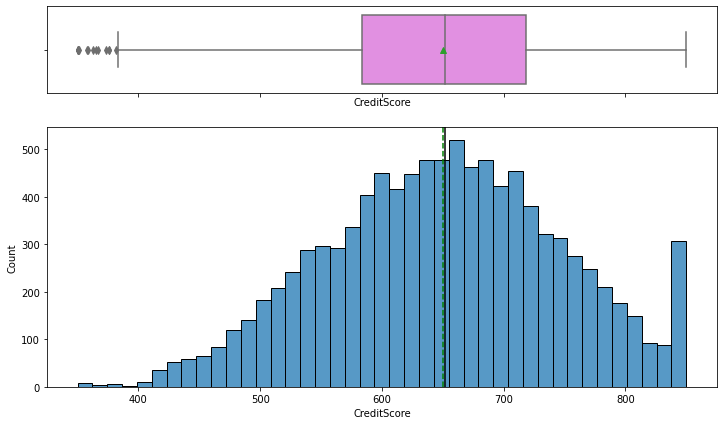

In [205]:
histogram_boxplot(data, "CreditScore")

- From the above plot, we observe that there are many customers with credit score less than 400. Which seems to be outliers

#### Observations on Age

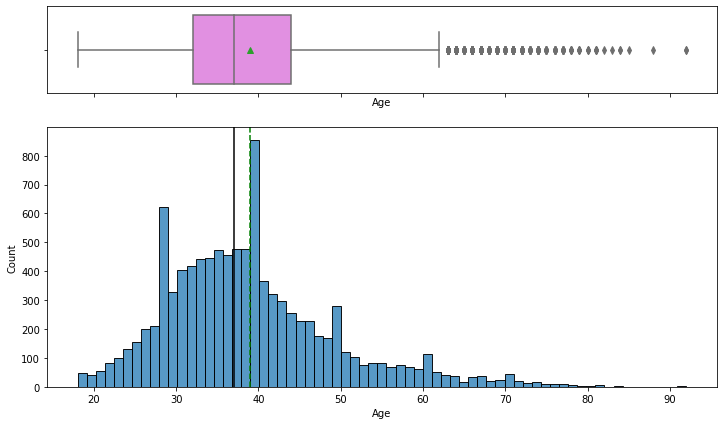

In [206]:
histogram_boxplot(data, "Age")

- Most of the bank's customers are under 40 years old despite a maximum value over 90 years old.
- We have some outliers at the right side of the boxplot

#### Observations on Tenure

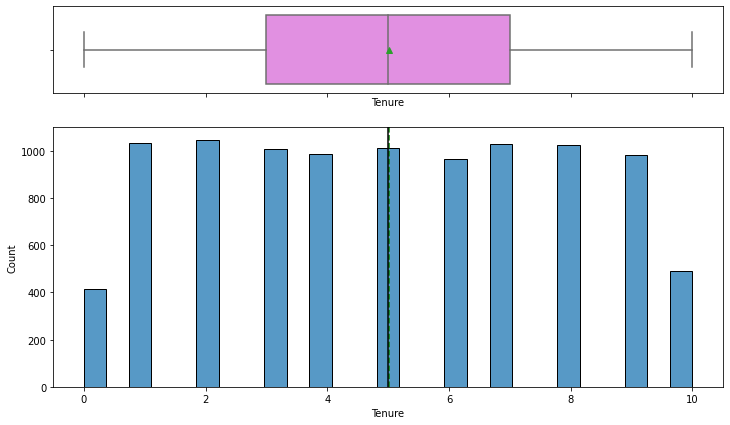

In [207]:
histogram_boxplot(data, "Tenure")

- 50% of the bank's customers have been with the bank for at least 5 years
- Few customers joined the bank less than a year ago

#### Observations on Balance

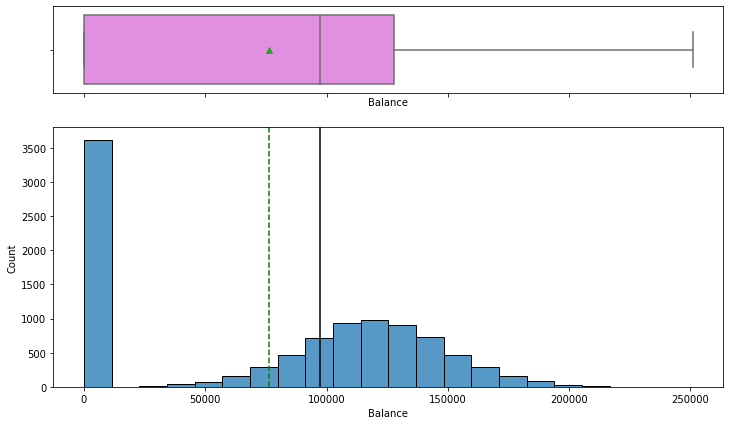

In [208]:
histogram_boxplot(data, "Balance")

- We observe that there are many customers of the bank having an Account balance more than 100K.

#### Observations on NumOfProducts

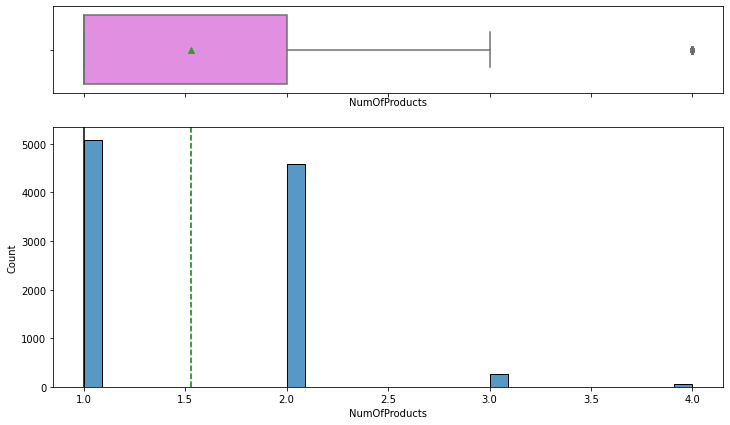

In [209]:
histogram_boxplot(data, "NumOfProducts")

- 1 and 2 are the most frequent number of products that the bank's customers  purchased. 3 and 4 products purchased are very rare

#### Observations on EstimatedSalary

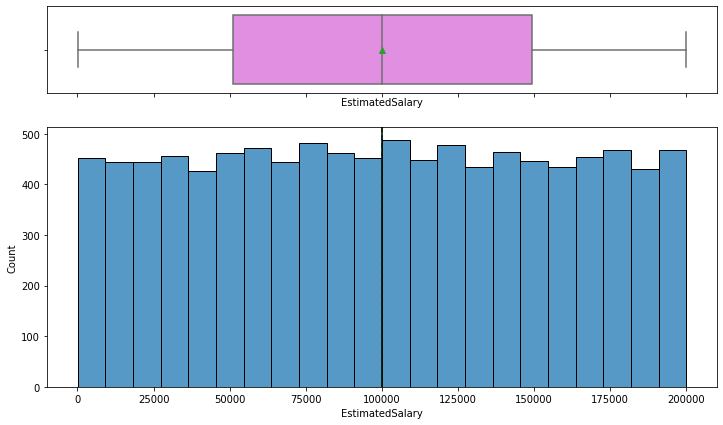

In [210]:
histogram_boxplot(data, "EstimatedSalary")

- From the plot above, we observe that there are many bank's customers having an estimated salary more than 100K.
- There is no great difference in the distribution (the frequency) of the customer's estimated salary

In [211]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Geography

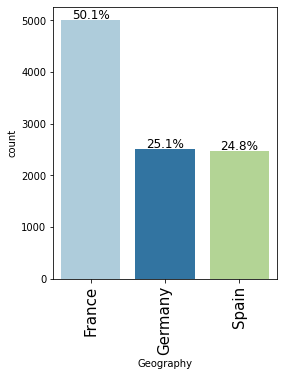

In [212]:
labeled_barplot(data, "Geography", perc=True)

* There are far more bank's customers from France in this dataset in comparison to Germany and Spain. 

* Around 50% of this dataset is customers from France and around 25% each for Germany and Spain

#### Observations on Gender

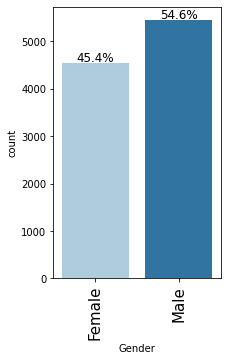

In [213]:
labeled_barplot(data, "Gender", perc=True)

* There are more males in this dataset in comparison to females. But not too much.
* Approx 55% of this dataset is male. Which does not represent a highly gender-skewed dataset and could not be a limitation with respect to implementing this model in the real world, since gender balance is highly important to create machine learning models that are practically implemented on datasets related to people.

#### Observations on HasCrCard

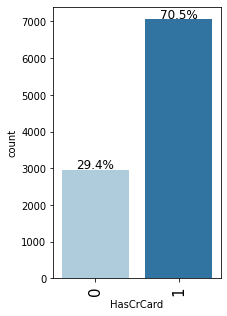

In [214]:
labeled_barplot(data, "HasCrCard", perc=True)

- More than 70% customers of the bank has a credit card whereas less than 30% doesn't

#### Observations on IsActiveMember

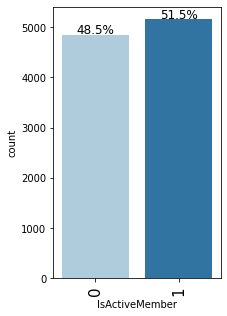

In [215]:
labeled_barplot(data, "IsActiveMember", perc=True)

- 51.5% of the bank's customers uses bank products regularly and make transactions while 48.5 of those customers is not active members of the bank

#### Observations on Exited

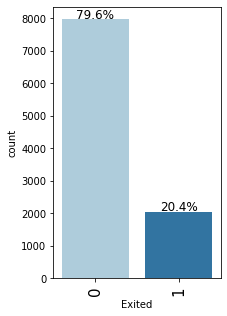

In [216]:
labeled_barplot(data, "Exited", perc=True)

* The plot above shows that the actual distribution of classes is itself imbalanced for the target variable.
* Only ~20% of the bank's customers in this dataset are more likely to churn.

### Bivariate Analysis

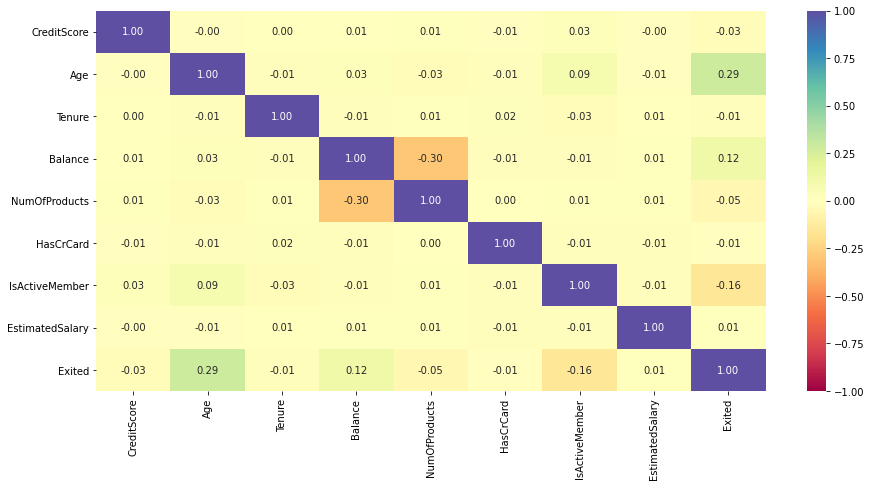

In [217]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- There are no significant correlations between the numerical variables of the dataset

In [218]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Geography VS Exited

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


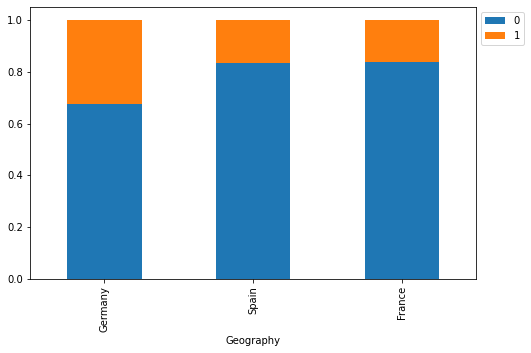

In [219]:
stacked_barplot(data, "Geography", "Exited")

- Bank's customers from Germany are more likely to churn (more than 35%), followed by customers Spain and France respectively, around 18%

### Gender VS Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


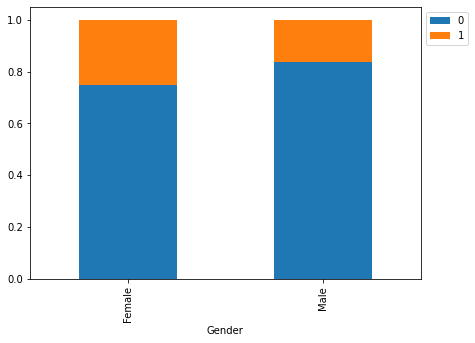

In [220]:
stacked_barplot(data, "Gender", "Exited")

* Approx 22% of females tends to leave the bank whereas only around 17% of males does it. 

* That shows that the retention rate of males is higher than that of females

#### HasCrCard and Exited

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


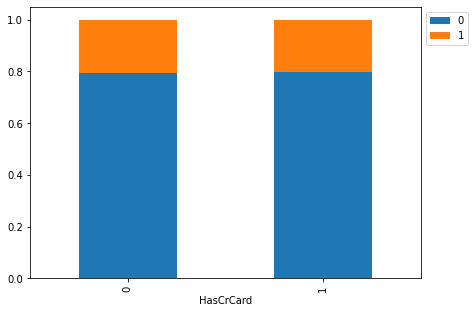

In [221]:
stacked_barplot(data, "HasCrCard", "Exited")

- The percentage of bank's customers likely to churn is almost the same whether the customers have a credit card or not.

- There is not obvious correlation between holding a bank's credit card or not and the customers will to leave

#### IsActiveMember and Exited

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


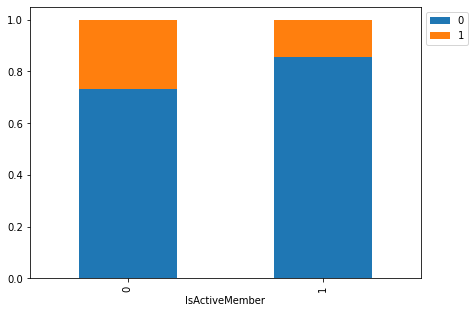

In [222]:
stacked_barplot(data, "IsActiveMember", "Exited")

- Approx 25% of the bank's non Active customers leaves the banks. The ratio is around 15% for Active customers of the bank

- Less the customers are Active, more they are likely to quit the bank

In [223]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### CreditScore VS Exited

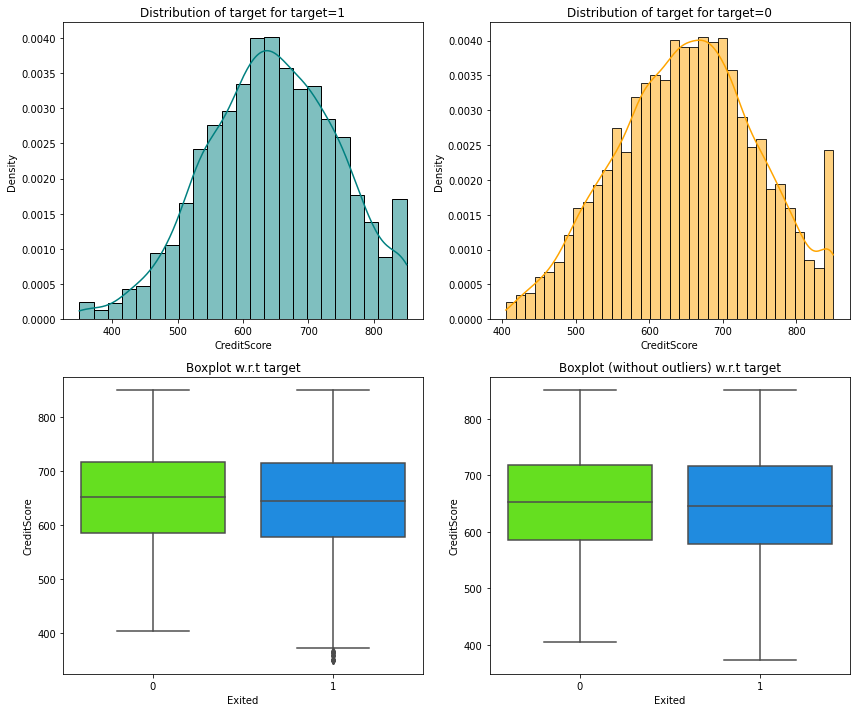

In [224]:
distribution_plot_wrt_target(data, "CreditScore", "Exited")

- The box plot above does no show so much contrast between customers wo left the bank and those who did not leave.

- Therefore, the CreditScore is not a differentiating criterion of customer loyalty to the bank.

### Age VS Exited

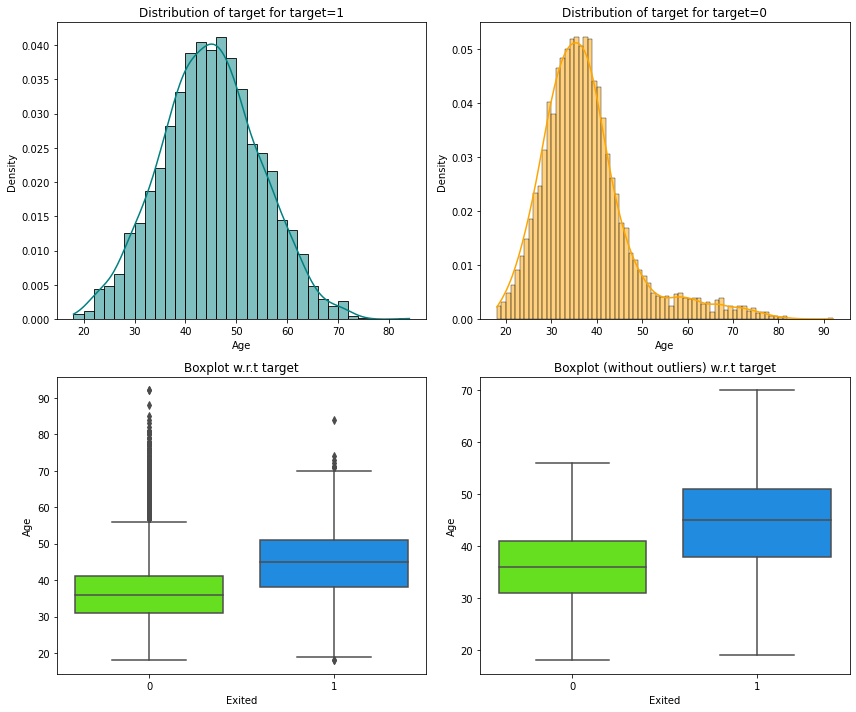

In [225]:
distribution_plot_wrt_target(data, "Age", "Exited")

* Customers who are more likely to quit the bank are generally older and having an average age of around 46 years.
* Customers who are less likely to leave the bank are generally younger and having an average age of around 36 years.

### Tenure VS Exited

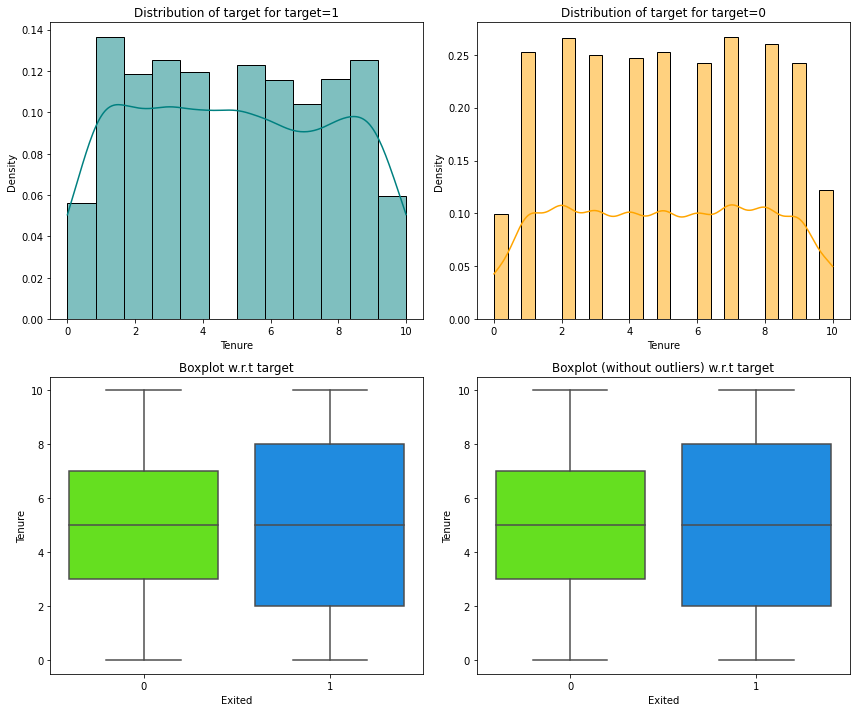

In [226]:
distribution_plot_wrt_target(data, "Tenure", "Exited")

* Bank's customers who churned and those who did not have both the same average and median Tenure.

* Nevertheless, the distribution of the number of years the customers have been with the bank is more widespread for those who did quit.

### Balance VS Exited

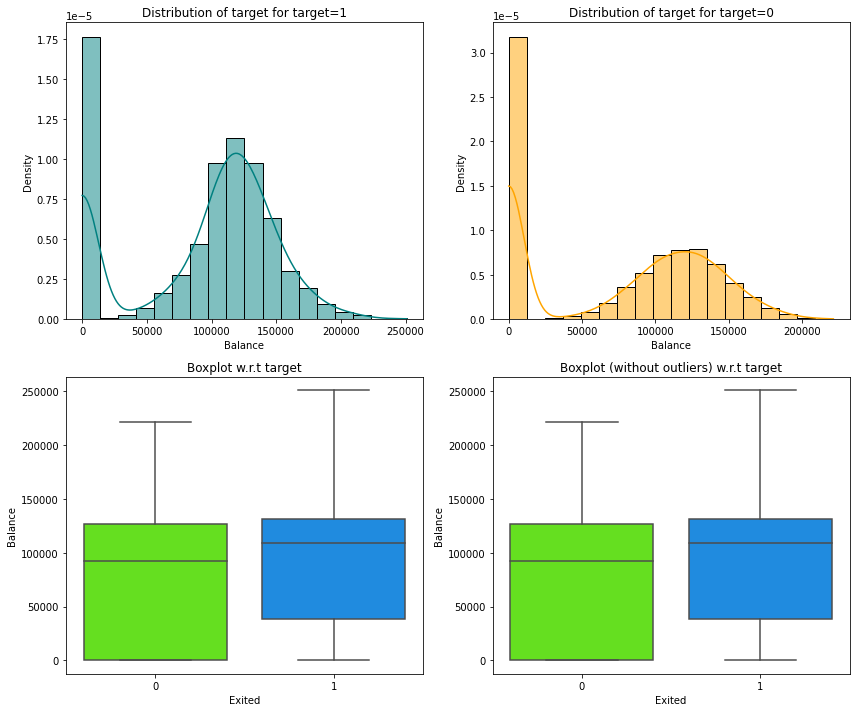

In [227]:
distribution_plot_wrt_target(data, "Balance", "Exited")


* Customers who left the bank have a greater account balance compared to the customers who did not leave the bank

### NumOfProducts VS Exited

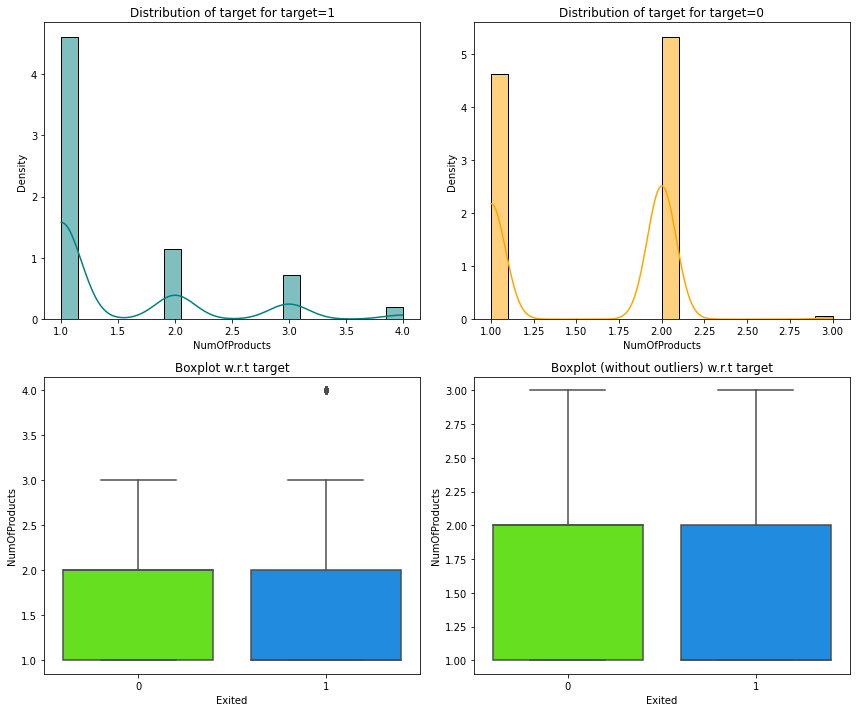

In [228]:
distribution_plot_wrt_target(data, "NumOfProducts", "Exited")

* There is no learning difference between the (NumOfProducts) number of bank products purchased by those who left the bank and the number of products purchased by those who stayed there

### EstimatedSalary VS Exited

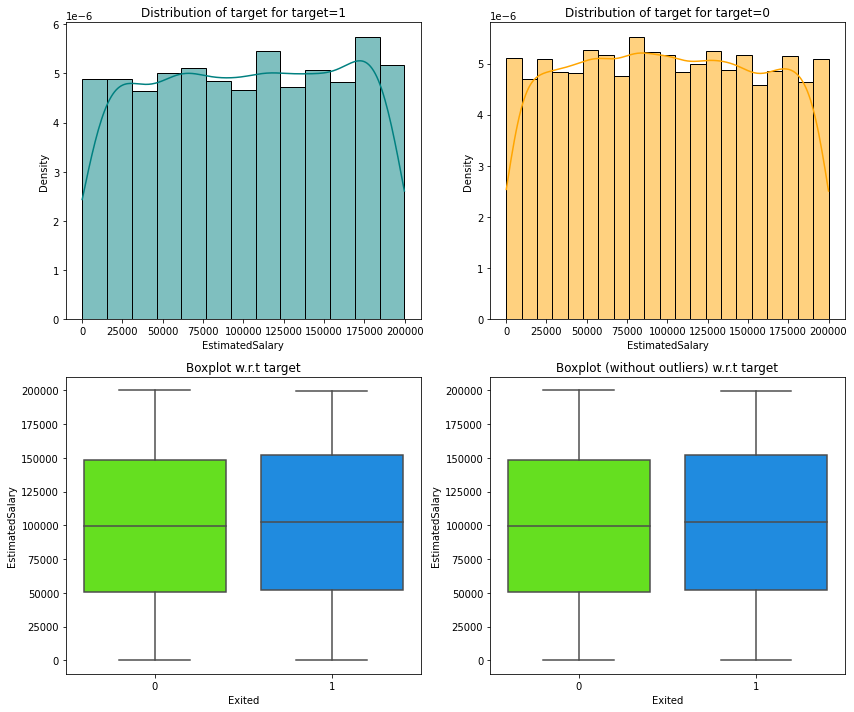

In [229]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")

* Concerning the Estimated salary, there is no significant difference between the estimated salary of clients who continued with the bank and the estimated salary of those who left the bank

## **Multivariate analysis**

### Gender VS Age VS Exited

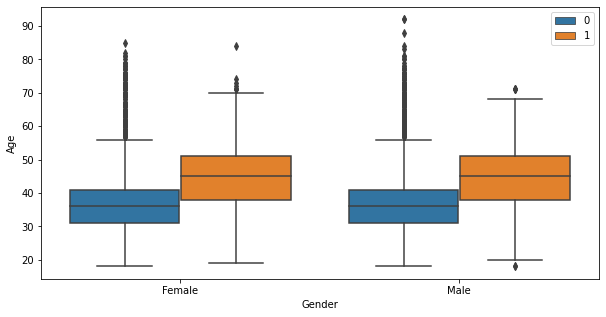

In [230]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Gender"], data["Age"], hue=data["Exited"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Older customers of the bank tend to leave more than younger customers, regardless the gender

### Gender VS CreditScore VS Exited

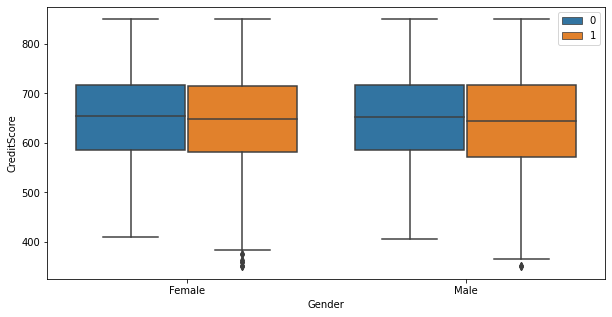

In [231]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Gender"], data["CreditScore"], hue=data["Exited"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The CreditScore (credit history of the customer) of the males who left the bank is a little bit lower compared to the CreditScore of the males who did not leave

### Gender VS Balance VS Exited

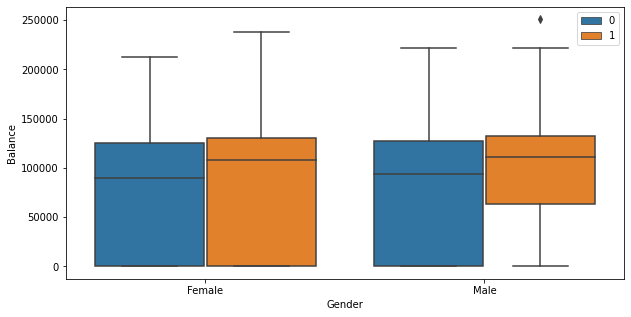

In [232]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Gender"], data["Balance"], hue=data["Exited"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* For males and females customers of the bank, the account balance is higher for those who exited than for those who did not exit.

### Gender VS NumOfProducts VS Exited

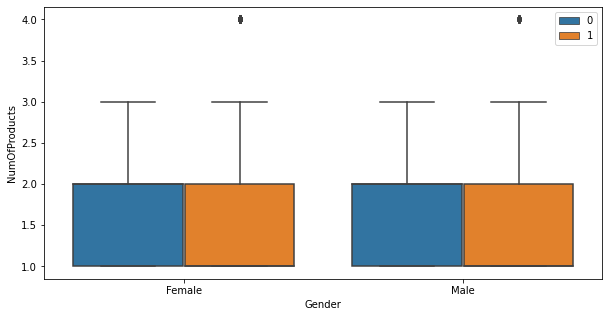

In [233]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Gender"], data["NumOfProducts"], hue=data["Exited"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Gender has no influence on the number of products purchased by the bank's customers

### Gender VS EstimatedSalary VS Exited

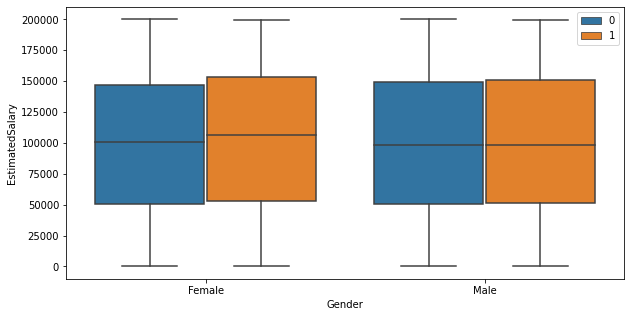

In [234]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Gender"], data["EstimatedSalary"], hue=data["Exited"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Estimated salary is little bit more important for female customers who left the bank

### Gender VS Tenure VS Exited

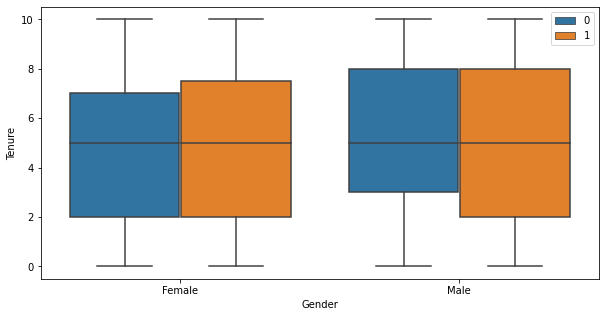

In [235]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Gender"], data["Tenure"], hue=data["Exited"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Female customers who left the bank have a higher tenure than those who did not leave
* Male customers who left the bank have a lower tenure than those who did not leave

### HasCrCard VS Age VS Exited

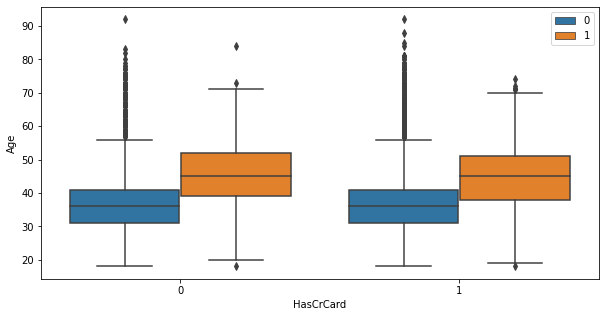

In [236]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["HasCrCard"], data["Age"], hue=data["Exited"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Many older bank's customers who did not possessed credit card left the bank
* Many older bank's customers who possessed credit card also left the bank

### HasCrCard VS Tenure VS Exited

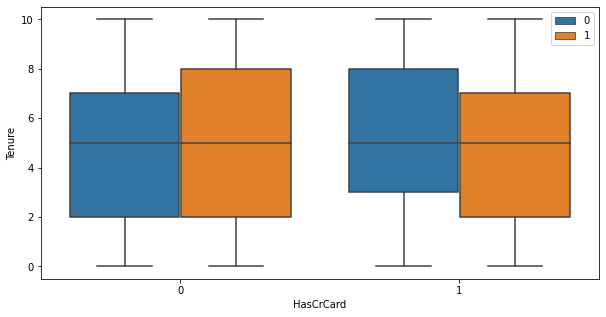

In [237]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["HasCrCard"], data["Tenure"], hue=data["Exited"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Bank's customers with no credit card and who have been with the bank for a long time are likely to leave.
* Conversely, bank's customers with credit card and who have been with the bank for a shorter period are likely to stay

### HasCrCard VS Balance VS Exited

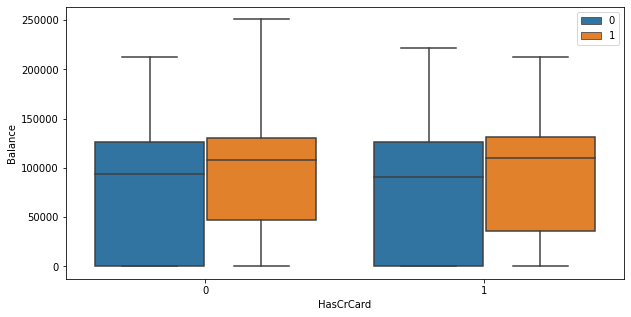

In [238]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["HasCrCard"], data["Balance"], hue=data["Exited"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Bank's customers without credit card who held greater account balance are more likely to leave the bank.
- Bank's customers with credit card who held greater account balance are also more likely to quit the bank

### HasCrCard VS NumOfProducts VS Exited

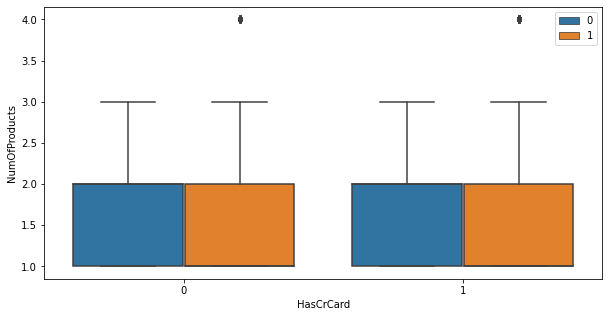

In [239]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["HasCrCard"], data["NumOfProducts"], hue=data["Exited"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- The number of products purchased is not a differenciating indicator between bank's customers who left the bank and who did not leave

### IsActiveMember VS Age VS Exited

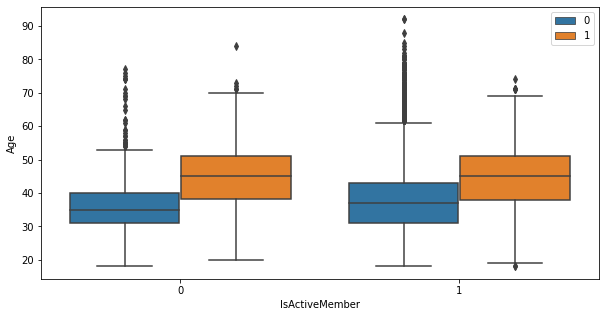

In [240]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["IsActiveMember"], data["Age"], hue=data["Exited"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Older bank's customers who are not active members of the bank are more likely to exit
* The same is true for older clients who are active members of the bank.

### IsActiveMember VS Tenure VS Exited

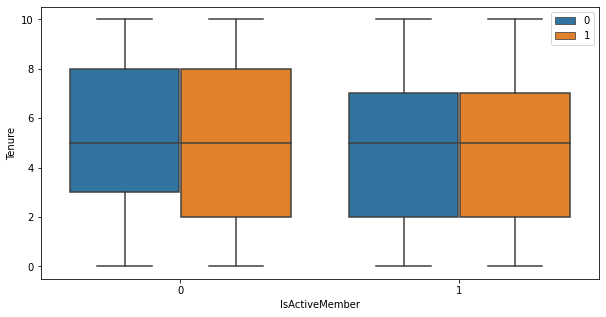

In [241]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["IsActiveMember"], data["Tenure"], hue=data["Exited"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Bank's customers who are non active and who have the less tenure are more likely to leave the bank
* The criteria of being active does not make any difference on the decision to quit the bank or not

### IsActiveMember VS Balance VS Exited

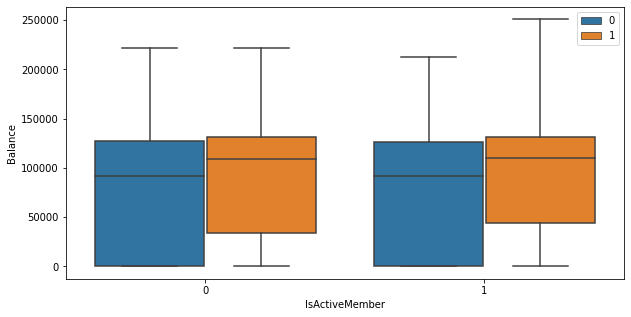

In [242]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["IsActiveMember"], data["Balance"], hue=data["Exited"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Bank's customers who churned are those with greater balance account, regardless whether they are active members or not

# **3)Illustration of the insights based on EDA**

- The dataset to analyze has 10000 rows and 14 columns.
- It has 11 numerical variables (9 of dtypes integers and 2 of dtypes floats) and 3 categorical variables.
- There is no missing value and no duplicate value in the data

**After a statistical summary of the numerical data, these are the observations:**

Outside of the RowNumber, CustomerId (an Unique ID number), IsActiveMember, HasCrCard and the Exited variable, we can 
considere there are only six numerical columns in the dataset, even if we have a maximum of 4 number of products that 
a customer has purchased through the bank.

- The column CreditScore seems to be a little bit normal distributed as the mean and the median are close to each other, even if the median looks slightly important than the mean (left skew)
- There is a little right skew in the Age and 75% of customers of the bank are less than 45 years old. With a maximum at 92, it seems to have some outliers in the column Age 
- The column Tenure looks normal distributed as the median and the mean re very close to each other
- The columns Balance (Account balance) is left skewed
- NumOfProducts (the number of products that a customer has purchased through the bank) is right skewed
- EstimatedSalary (Estimated salary) looks like it is normal distributed

**After a look at different levels in categorical variables, these are the observations:**

- There are 2 Genders (Male and Female, with slightly more men than women)
- The customers of the bank are from 3 countries : France, Germany and Spain
- There are many distinct values (2932) in Surname column. Unfortunately we cannot extract any relevant information from to build our outcoming models. So, we'll drop the column.

- RowNumber columns consists of uniques row counts for dataset indexes and hence will drop it
- CustomerId columns consists of uniques ID for clients and hence will not add any value to the modeling


**Exploratory Data Analysis on the data:**

* Imbalanced dataset or not?:

	* Our target variable counts approx 80% of 0 and 20% of 1. 0=No (Customer did not leave the bank) and 1=Yes 
	  (Customer left the bank).
	* Therefore, the dataset is imbalanced as the target class has an uneven distribution of observations.

* EDA:
	- **Key meaningful observations from:**
	- *Univariate Analysis*
		- Observations on CreditScore : From the plot, we observe that there are many customers with credit score 
		  less than 400. Which seems to be outliers.
		- Observations on Age : Most of the bank's customers are under 40 years old despite a maximum value over 90 
		  years old. We have some outliers at the right side of the boxplot.
		- Observations on Tenure: 50% of the bank's customers have been with the bank for at least 5 years. Few 
		  customers joined the bank less than a year ago.
		- Observations on Balance : We observe that there are many customers of the bank having an Account balance 
		  more than 100K.
		- Observations on EstimatedSalary: From the plot above, we observe that there are many bank's customers 
		  having an estimated salary more than 100K.
		- Observations on Geography : There are far more bank's customers from France in this dataset in comparison 
		  to Germany and Spain. Around 50% of this dataset is customers from France and around 25% each for Germany 
		  and Spain.
		- Observations on Gender: There are more males in this dataset in comparison to females. But not too much. 
		  Approx 55% of this dataset is male. Which does not represent a highly gender-skewed dataset and could not 
		  be a limitation with respect to implementing this model in the real world, since gender balance is highly 
		  important to create machine learning models that are practically implemented on datasets related to people.
		- Observations on HasCrCard: More than 70% customers of the bank has a credit card whereas less than 30% 
		  doesn't.
		- Observations on IsActiveMember: 51.5% of the bank's customers uses bank products regularly and make 
		  transactions while 48.5 of those customers is not active members of the bank.
		- Observations on Exited: The plot above shows that the actual distribution of classes is itself imbalanced 
		  for the target variable. Only ~20% of the bank's customers in this dataset are more likely to churn.

	*Bivariate Analysis*
		- Correlation : There are no significant correlations between the numerical variables of the dataset
		- Geography VS Exited: Bank's customers from Germany are more likely to churn (more than 35%), followed by 
		  customers Spain and France respectively, around 18%
		- Gender VS Exited : Approx 22% of females tends to leave the bank whereas only around 17% of males does it.
		  That shows that the retention rate of males is higher than that of females.
		- HasCrCard and Exited: The percentage of bank's customers likely to churn is almost the same whether the 
		  customers have a credit card or not. There is not obvious correlation between holding a bank's credit card 
		  or not and the customers will to leave.
		- IsActiveMember and Exited: Approx 25% of the bank's non Active customers leaves the banks. The ratio is 
		  around 15% for Active customers of the bank. Less the customers are Active, more they are likely to quit 
		  the bank.
		- CreditScore VS Exited: The box plot above does no show so much contrast between customers wo left the bank 
		  and those who did not leave. Therefore, the CreditScore is not a differentiating criterion of customer 
		  loyalty to his bank.
		- Age VS Exited: Customers who are more likely to quit the bank are generally older and having an average 
		  age of around 46 years. Customers who are less likely to quit the bank are generally younger and having 
		  an average age of around 36 years.
		- Tenure VS Exited : Bank's customers who churned and those who did not have both the same average and 
		  median Tenure. Nevertheless, the distribution of the number of years the customers have been with the bank 
		  is more widespread for those who did quit.
		- Balance VS Exited: Customers who left the bank have a greater account balance compared to the customers 
		  who did not leave the bank.
		- NumOfProducts VS Exited: There is no learning difference between the (NumOfProducts) number of bank 
		  products purchased by those who left the bank and the number of products purchased by those who stayed 
		  there
		- EstimatedSalary VS Exited: Concerning the Estimated salary, there is no significant difference between the 
		  estimated salary of clients who continued with the bank and the estimated salary of those who left the bank

	*Multivariate analysis*
		- Gender VS Age VS Exited: Older customers of the bank tend to leave more than younger customers, regardless 
		  of gender.
		- Gender VS CreditScore VS Exited: The CreditScore (credit history of the customer) of the males who left the
		  bank is a little bit lower compared to the CreditScore of the males who did not leave.
		- Gender VS Balance VS Exited: For males and females customers of the bank, the account balance is higher for
		  those exited than for those did not exit.
		- Gender VS NumOfProducts VS Exited: Gender has no influence on the number of products purchased by the 
		  bank's customers.
		- Gender VS EstimatedSalary VS Exited: Estimated salary is little bit more important for female customers who
		  left the bank.
		- Gender VS Tenure VS Exited:Female customers who left the bank have a higher tenure than those who did not 
		  leave. Male customers who left the bank have a lower tenure than those who did not leave.
		- HasCrCard VS Age VS Exited: Older bank's customers who did not possessed credit card left the bank. Older 
		  bank's customers who possessed credit card also left the bank.
		- HasCrCard VS Tenure VS Exited: Bank's customers with no credit card and who have been with the bank longer 
		  are likely to leave. Conversely, bank's customers with credit card and who have been with the bank for a 
		  shorter period are likely to stay.
		- IsActiveMember VS Age VS Exited: Older bank's customers who are not active members of the bank are more 
		  likely to exit. The same is true for older clients who are active members of the bank.
		- IsActiveMember VS Tenure VS Exited: Bank's customers who are non active and who have the less tenure are 
		  more likely to leave the bank. The criteria of being active does not make any difference on the decision 
		  to quit the bank or not.

# **4) Data Pre-processing**

As there is no missing value in the data, no imputation is needed.

### **Split the target variable and predictors**

In [243]:
## Separating Independent and Dependent Columns
X = data.drop(['Exited'],axis=1)
y = data[['Exited']]

In [244]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


### **Split the data into train and test**

In [245]:
# Splitting the dataset into the Training and Testing set.
X_big, X_test, y_big, y_test = train_test_split(X,y, test_size = 0.1, random_state = 5, shuffle = True, stratify = y)

In [246]:
# Splitting the dataset into the Training and validation set.
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.3, random_state = 5,shuffle = True)

In [247]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2860,674,France,Male,45,7,142072.02,1,1,0,37013.29
7450,712,Spain,Female,39,5,163097.55,2,1,1,23702.42
7375,639,France,Male,77,6,80926.02,2,1,1,55829.25
7055,620,France,Female,33,9,127638.35,1,1,1,192717.57
1181,651,Germany,Female,24,7,40224.70,1,1,1,178341.33


## **Normalizing / Rescale the data**

##### **Why scaling is done?**

The numerical columns present in this dataset are having different units (currencies, years, etc). So scaling would help them all be in the same range.

**For example** -
If we have multiple independent variables like age, salary, and height, With their range as (18–100 Years), (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range.

In [248]:
sc=StandardScaler()

temp = sc.fit(X_train[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts","EstimatedSalary"]])
X_train[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts","EstimatedSalary"]] = temp.transform(X_train[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts","EstimatedSalary"]])
X_val[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts","EstimatedSalary"]] = temp.transform(X_val[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts","EstimatedSalary"]])
X_test[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts","EstimatedSalary"]] = temp.transform(X_test[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts","EstimatedSalary"]])

Since we are solving a classification problem, we will not scale the target variable

**Categorical Encoding**

In [249]:
## Storing required categorical variables in cat_dat to apply dummification 
cat_data = ["Geography",'Gender']

In [250]:
# Using pd.get dummies to encode the categorical columns in the data
X_train = pd.get_dummies(X_train,columns=cat_data,drop_first= True)
X_test = pd.get_dummies(X_test,columns=cat_data,drop_first= True)
X_val = pd.get_dummies(X_val,columns=cat_data,drop_first= True)   

In [251]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6300, 11)
(2700, 11)
(6300, 1)
(2700, 1)
(1000, 11)
(1000, 1)


# **4)Model building**

#### **A model can make wrong predictions in the following ways:**
* Predicting a bank's customer is going to leave the bank, when he/she is not going to. 
* Predicting a bank's customer is not going to leave the bank, when he/she is in fact going to join another service provider.

#### **Which case is more important?**

- Predicting that a bank's customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

### How to reduce this loss i.e need to reduce False Negatives?
* The bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition (churn).

## **Build Neural Network**

In [252]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [253]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 11, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

In [254]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


**Observations**
- The summary of the model shows each layer's name, type, output shape, and the number of parameters at that particular layer.
- It also shows the total number of trainable and non-trainable parameters in the model. A parameter whose value is learned while training the model is called a trainable parameter otherwise it is called a non-trainable parameter.
- In the first layer total parameters are calculated by the number of neurons in the hidden layer multiplied by the number of variables fed to neural networks plus bias. (11*64)+64 = 768
- In the next layer the parameters are calculated by the number of outputs from the previous layer multiplied by the number of neurons in the second layer plus bias. (64*32)+32 =2080

In [255]:
# Initializing the Optimizer (Stochastic Gradient Descent)
sgd = optimizers.SGD(lr=1e-3)
# Compiling the model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [256]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
158/158 [==============================] - 0s 1ms/step - loss: 0.6366 - accuracy: 0.7085 - val_loss: 0.6055 - val_accuracy: 0.7762
Epoch 2/50
158/158 [==============================] - 0s 888us/step - loss: 0.5859 - accuracy: 0.7819 - val_loss: 0.5647 - val_accuracy: 0.7976
Epoch 3/50
158/158 [==============================] - 0s 872us/step - loss: 0.5532 - accuracy: 0.7899 - val_loss: 0.5377 - val_accuracy: 0.7984
Epoch 4/50
158/158 [==============================] - 0s 899us/step - loss: 0.5315 - accuracy: 0.7903 - val_loss: 0.5198 - val_accuracy: 0.7960
Epoch 5/50
158/158 [==============================] - 0s 886us/step - loss: 0.5170 - accuracy: 0.7897 - val_loss: 0.5077 - val_accuracy: 0.7960
Epoch 6/50
158/158 [==============================] - 0s 940us/step - loss: 0.5069 - accuracy: 0.7893 - val_loss: 0.4991 - val_accuracy: 0.7960
Epoch 7/50
158/158 [==============================] - 0s 890us/step - loss: 0.4997 - accuracy: 0.7893 - val_loss: 0.4929 - val_accuracy: 0

- Here the model seems to be overfitted, as the distance between the train curve and validation curve started increasing.

32/32 [==============================] - 0s 619us/step - loss: 0.4271 - accuracy: 0.8030


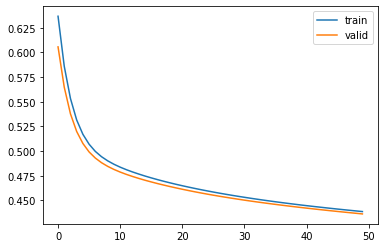

In [257]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

* Here the model seems to be fitted, as the distance between the train curve and validation curve is small.

In [258]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [259]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

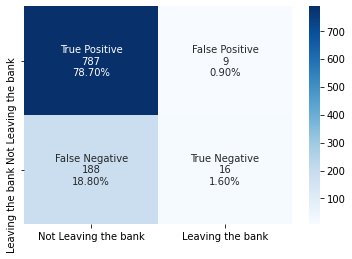

In [260]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Positive','False Negative','True Negative']
categories = [ 'Not Leaving the bank','Leaving the bank']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Here, the 18.8% of False Negatives is because we gave 0.5 as the threshold to the model, and as this is an imbalanced dataset, we should calculate the threshold using the AUC-ROC curve. 

**Model Performance Evaluation**


In [261]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       796
           1       0.64      0.08      0.14       204

    accuracy                           0.80      1000
   macro avg       0.72      0.53      0.51      1000
weighted avg       0.77      0.80      0.74      1000



**Comment on model performance:**
- The model has a good accuracy (0.80)
- It is performing very well on predicting the class 0 (Recall at 0.99) but performing poorly on predicting the class 1 (Recall at 0.08)
- Precision score has a fairly good level for both classes 0 and 1
- F1 score is high for predicting the class 0 but weak for the prediction of class 1

This could be due to the imbalanced dataset.  

1) **Imbalanced dataset**: As we have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the **0** class.

2) **Decision Threshold**: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.


# **5) Model Performance Improvement**

## **Find the optimal threshold using ROC-AUC curves**

Best Threshold=0.236826, G-Mean=0.728


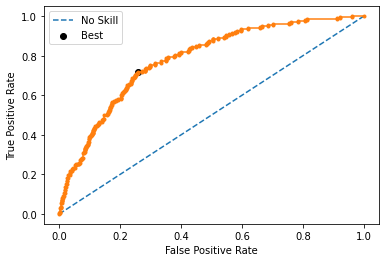

In [262]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

Based on ROC-AUC curve, the optimal threshold is at 0.24

## **Model performence with the threshold at 0.24**

In [263]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.24)
y_pred

array([[False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

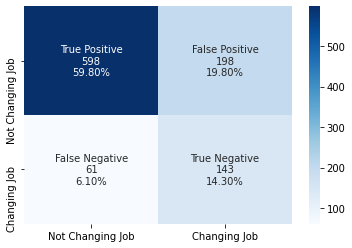

In [264]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Positive', 'False Negative','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- Here, the 6.1% of False Negatives is because we found the optimal threshold at 0.24 using ROC-AUC curve

**Model Performance Evaluation**

In [265]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       796
           1       0.42      0.70      0.52       204

    accuracy                           0.74      1000
   macro avg       0.66      0.73      0.67      1000
weighted avg       0.81      0.74      0.76      1000



## **Comment on model performance:**

* With a ROC-AUC curve at 0.24, Accuracy decreases from 0.80 to 0.74
* The recall performance decreases on predicting the class 0 but increases very well on predicting better the class 1. The False Negative ratio has fallen considerably from the previous level
* Precision performance increases on predicting the class 0 and predicts poorly the class 1
* The score F1 tends to tighten. Indeed, It improves for Class 1 prediction, even if it decreases for Class 0 prediction.

**To try to improve the model, let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.**

## **Build another model to implement these improvements**

### **Model 2**

In [266]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [267]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))

In [268]:
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [269]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0
_________________________________________________________________


In [270]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
79/79 [==============================] - 1s 3ms/step - loss: 0.4396 - accuracy: 0.8081 - val_loss: 0.3829 - val_accuracy: 0.8413
Epoch 2/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8407 - val_loss: 0.3775 - val_accuracy: 0.8516
Epoch 3/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8506 - val_loss: 0.3700 - val_accuracy: 0.8595
Epoch 4/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8571 - val_loss: 0.3808 - val_accuracy: 0.8548
Epoch 5/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8587 - val_loss: 0.3663 - val_accuracy: 0.8532
Epoch 6/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8589 - val_loss: 0.3636 - val_accuracy: 0.8540
Epoch 7/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8639 - val_loss: 0.3867 - val_accuracy: 0.8429
Epoch 8/50
79/79 [==

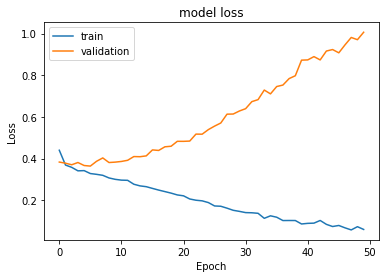

In [271]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* As we increased the depth of the neural network and changed the optimizer to Adam, we can see smoother loss curves for both train and validation. But the distance between the training and the validation data is still high. The model also seems to be overfitted

Best Threshold=0.023600, G-Mean=0.712


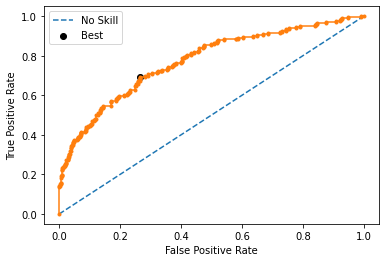

In [272]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Let's tune the threshold using ROC-AUC**

There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(), 

and select the threshold with the **largest G-Mean value.**

In [273]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

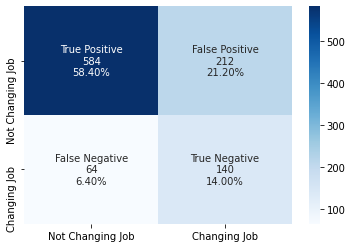

In [274]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Positive','False Negative','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Model Performance Evaluation**

In [275]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       796
           1       0.40      0.69      0.50       204

    accuracy                           0.72      1000
   macro avg       0.65      0.71      0.66      1000
weighted avg       0.80      0.72      0.75      1000



* As the number of layers in the neural network has increased, we can see that the macro recall performance has decreased both on predicting classe 1 than to predicting class 0, compared to the previous one with optimal threshold using ROC-AUC curves. 
* The False Negative percentage has slightly increased. 
* Precision has decreased a little bit and F1 score as well
* Accuracy has declined again


* Now let's try to use the Batch Normalization technique and check to see if we can increase the recall performance.

### **Model 3**

In [276]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [277]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [278]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [279]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [280]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
79/79 [==============================] - 1s 3ms/step - loss: 0.4945 - accuracy: 0.7546 - val_loss: 0.4649 - val_accuracy: 0.8175
Epoch 2/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8383 - val_loss: 0.4058 - val_accuracy: 0.8206
Epoch 3/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8446 - val_loss: 0.3828 - val_accuracy: 0.8452
Epoch 4/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8575 - val_loss: 0.3689 - val_accuracy: 0.8571
Epoch 5/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3291 - accuracy: 0.8611 - val_loss: 0.3659 - val_accuracy: 0.8571
Epoch 6/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8659 - val_loss: 0.3645 - val_accuracy: 0.8492
Epoch 7/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8698 - val_loss: 0.3705 - val_accuracy: 0.8508
Epoch 8/50
79/79 [==

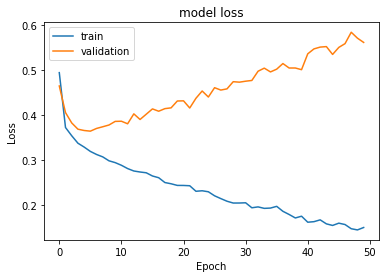

In [281]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* Unfortunately, from the above plot we observe that the model still seems to be overfitted on the training data because there is a significant difference in performance between train and validation.

Best Threshold=0.067831, G-Mean=0.724


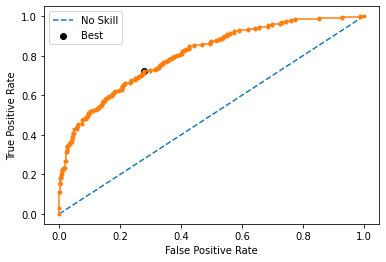

In [282]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [283]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

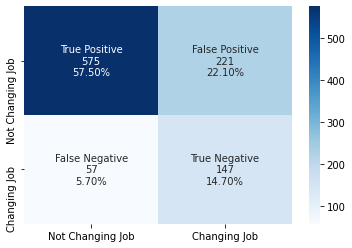

In [284]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Positive','False Negative','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Model Performance Evaluation**

In [285]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.91      0.72      0.81       796
           1       0.40      0.72      0.51       204

    accuracy                           0.72      1000
   macro avg       0.65      0.72      0.66      1000
weighted avg       0.81      0.72      0.75      1000



* Accuracy and the recall are quiete stable. The other performance metrics(F1 and precision scores) keep still.
* A lower False Negative rate compared to the previous model

**Let's try to use the Dropout technique and check to see if it can reduce the False Negative rate.**

### **Model 4**

In [286]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [287]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [288]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [289]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [290]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
79/79 [==============================] - 1s 3ms/step - loss: 0.4843 - accuracy: 0.7784 - val_loss: 0.4211 - val_accuracy: 0.8206
Epoch 2/50
79/79 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8202 - val_loss: 0.3759 - val_accuracy: 0.8516
Epoch 3/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8349 - val_loss: 0.3720 - val_accuracy: 0.8563
Epoch 4/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8452 - val_loss: 0.3660 - val_accuracy: 0.8556
Epoch 5/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8488 - val_loss: 0.3593 - val_accuracy: 0.8635
Epoch 6/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8514 - val_loss: 0.3587 - val_accuracy: 0.8587
Epoch 7/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8512 - val_loss: 0.3576 - val_accuracy: 0.8603
Epoch 8/50
79/79 [==

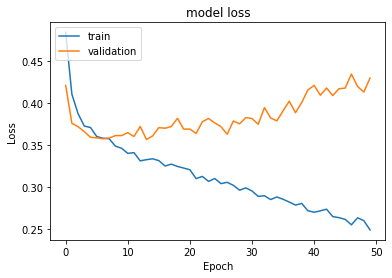

In [291]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that the distance between the train curve and validation curve still wide. The model still seems to be overfitted.

Best Threshold=0.110541, G-Mean=0.761


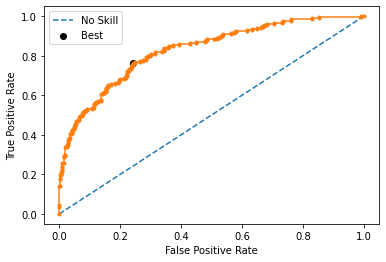

In [292]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [293]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

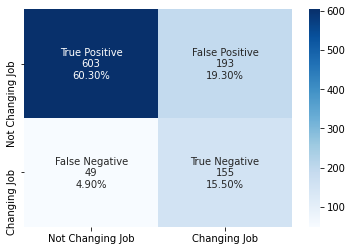

In [294]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Positive','False Negative','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Model Performance Evaluation**

In [295]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       796
           1       0.45      0.76      0.56       204

    accuracy                           0.76      1000
   macro avg       0.69      0.76      0.70      1000
weighted avg       0.83      0.76      0.78      1000



* The Dropout technique helped the model reduce the loss function of both train and validation sets. The recall performance seems to be not too bad, with a decrease in the False Negative rate. The lowest level so far.
* Accuracy and the other performance metrics have sligthly increased too.

**Now, let's try to use some of the Hyperparameter Optimization techniques such as RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the recall performance of the model.**

### **Model 5**

#### **Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [296]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [297]:
def create_model_v4(lr,batch_size,epochs,momentum,activation,neurons):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

      #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We are using Random search to optimize five hyperparameters - **Batch size**, **Learning Rate**, **momentum**, **activation** and **neurons**.

In [298]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],
    "epochs": [10,20,30,40,50, 100],
    "momentum": [0.0, 0.2, 0.4, 0.6, 0.8, 0.9],
    "activation": ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
    "neurons" : [1, 5, 10, 15, 20, 25, 32, 50, 64, 80, 100, 128, 150, 200, 256],}

kfold_splits = 5
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [299]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Epoch 1/10
79/79 [==============================] - 1s 3ms/step - loss: 0.4496 - accuracy: 0.7946 - val_loss: 0.3937 - val_accuracy: 0.8262
Epoch 2/10
79/79 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8272 - val_loss: 0.3932 - val_accuracy: 0.8341
Epoch 3/10
79/79 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8387 - val_loss: 0.3994 - val_accuracy: 0.8548
Epoch 4/10
79/79 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8417 - val_loss: 0.3762 - val_accuracy: 0.8516
Epoch 5/10
79/79 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8429 - val_loss: 0.3638 - val_accuracy: 0.8587
Epoch 6/10
79/79 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8462 - val_loss: 0.3620 - val_accuracy: 0.8540
Epoch 7/10
79/79 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8506 -

The best model is with the following configuration: 

( It may vary each time the code runs ) 

**Result of Random Search**

{'neurons': 25, 'momentum':0.8, 'batch_size': 64, 'learning_rate": 0.01, 'epochs':10}

**Let's create the final model with the above mentioned configuration**

In [300]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'],
                             momentum=random_result.best_params_['momentum'], activation=random_result.best_params_['activation'],
                             neurons=random_result.best_params_['neurons'],epochs=random_result.best_params_['epochs'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [301]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=20, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/20
79/79 [==============================] - 1s 3ms/step - loss: 0.4466 - accuracy: 0.8032 - val_loss: 0.3926 - val_accuracy: 0.8381
Epoch 2/20
79/79 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8333 - val_loss: 0.3807 - val_accuracy: 0.8437
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.3849 - accuracy: 0.8395 - val_loss: 0.3679 - val_accuracy: 0.8508
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8411 - val_loss: 0.3662 - val_accuracy: 0.8635
Epoch 5/20
79/79 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8431 - val_loss: 0.3608 - val_accuracy: 0.8603
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.3703 - accuracy: 0.8442 - val_loss: 0.3614 - val_accuracy: 0.8500
Epoch 7/20
79/79 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8508 - val_loss: 0.3658 - val_accuracy: 0.8548
Epoch 8/20
79/79 [==

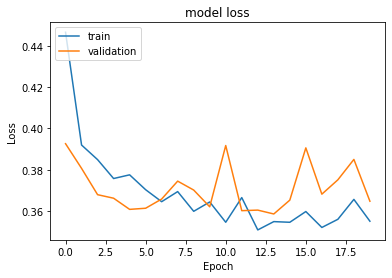

In [302]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is noise in the training behavior of the model. The model is overfitted

Best Threshold=0.173163, G-Mean=0.774


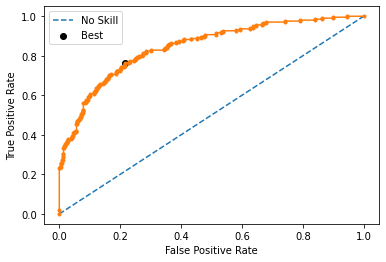

In [303]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [304]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

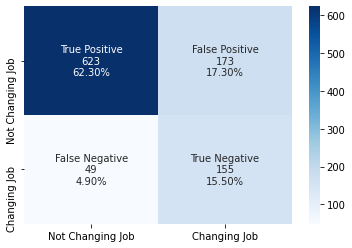

In [305]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Positive','False Negative','True Negative']
categories = ['Not Changing Job','Changing Job']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Model Performance Evaluation**

In [306]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       796
           1       0.47      0.76      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.78      0.79      1000




Hyperparameters used to tune the model has helped the model performing a little bit better than the previous one. 
- Recall score increases. 
- The False Negative rates is stable compared to the dropout model
- The accuracy and other scores (F1 and precision) metrics have also increased. 
Hyperparameter tuning is used here to get a better recall performance, but the recall performance may differ each time. 

Other hyperparameters can also be tuned to get better performance on the metrics. 

Here, the recall performance of the model has increased in comparison to the previous best performance, as Random Search CV will choose the hyperparameters randomly, and hence has a very low chance of finding a highly optimal configuration. 


**Let's use the more exhaustive Grid Search CV and see if the recall performance increases.**

### **Model 6**

#### **Grid Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [307]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [308]:
def create_model_v5(lr,batch_size, momentum, epochs):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We're using Grid Search to optimize five hyperparameters - **Batch size**, **Learning Rate**, **momentum**, **activation** and **neurons**.

In [309]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],
    "momentum": [0.0, 0.2, 0.4, 0.6, 0.8, 0.9],
    "epochs": [10,20,30,40,50, 100],}
    # "epochs": [10,20,30,40,50, 100],
    #"momentum": [0.0, 0.2, 0.4, 0.6, 0.8, 0.9],
    #"activation": ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
   #"neurons" : [1, 5, 10, 15, 20, 25, 32, 50, 64, 80, 100, 128, 150, 200, 256],}

kfold_splits = 5
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [310]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Epoch 1/20
40/40 [==============================] - 1s 6ms/step - loss: 0.4770 - accuracy: 0.7800 - val_loss: 0.4146 - val_accuracy: 0.8262
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.8286 - val_loss: 0.3809 - val_accuracy: 0.8381
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3936 - accuracy: 0.8369 - val_loss: 0.3702 - val_accuracy: 0.8500
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3783 - accuracy: 0.8409 - val_loss: 0.3697 - val_accuracy: 0.8595
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3835 - accuracy: 0.8421 - val_loss: 0.3710 - val_accuracy: 0.8595
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3697 - accuracy: 0.8522 - val_loss: 0.3647 - val_accuracy: 0.8460
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.850

**We ran this model with all the hyperparameters gathered during at least 18 hours but, unfortunately we had to interrupt the kernel as the model was still running. We didn't know when it would have finish. Therefore, we reduced the number of hyperparameters**

In [311]:
estimator_v5=create_model_v5(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'],
                             momentum=random_result.best_params_['momentum'], epochs=random_result.best_params_['epochs'])

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [312]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
79/79 [==============================] - 1s 3ms/step - loss: 0.4466 - accuracy: 0.8032 - val_loss: 0.3926 - val_accuracy: 0.8381
Epoch 2/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8333 - val_loss: 0.3807 - val_accuracy: 0.8437
Epoch 3/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8395 - val_loss: 0.3679 - val_accuracy: 0.8508
Epoch 4/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8411 - val_loss: 0.3662 - val_accuracy: 0.8635
Epoch 5/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8431 - val_loss: 0.3608 - val_accuracy: 0.8603
Epoch 6/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8442 - val_loss: 0.3614 - val_accuracy: 0.8500
Epoch 7/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8508 - val_loss: 0.3658 - val_accuracy: 0.8548
Epoch 8/50
79/79 [==

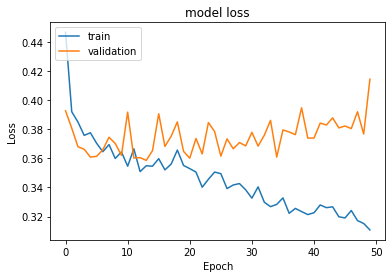

In [313]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both curves - train and validation, are still not smooth. There is an overfitting

Best Threshold=0.146376, G-Mean=0.767


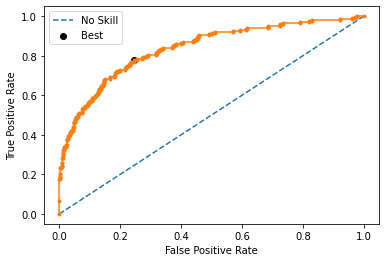

In [314]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [315]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [

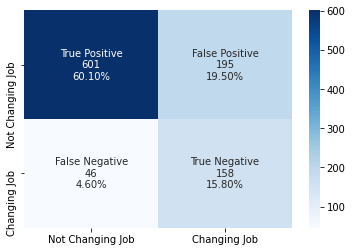

In [316]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Positive','False Negative','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Model Performance Evaluation**

In [317]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.93      0.76      0.83       796
           1       0.45      0.77      0.57       204

    accuracy                           0.76      1000
   macro avg       0.69      0.76      0.70      1000
weighted avg       0.83      0.76      0.78      1000



Hyperparameter tuning with Grid Search has been used here to get a better recall performance, but the recall score might differ each time. 

- Here, the recall performance of the model has slightly decreased than with Randomized Search. However, it is slightly better than in Model 4 (the Dropout model) and Model 3 (the Batch Normalization).
- Accuracy has also slightly decreased. F1 and precision scores as well
- The rate of False Negatives is so far the best


### **Dask**

* There is also another library called Dask, sometimes used in the industry to provide a performance boost to Hyperparameter Tuning due to its parallelized computing procedure. 
* Dask also has the option of implementing Grid Search similar to the Grid Search in Scikit-learn.

In [318]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

* Dask is the same as regular Grid Search in its functioning. 
* We just have to change the function from GridSearchCV to DaskGridSearchCV.

In [319]:
def create_model_v6(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [320]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],
    }
   # "epochs": [10,20,30,40,50, 100],
    #"momentum": [0.0, 0.2, 0.4, 0.6, 0.8, 0.9],
    #"activation": ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
    #"neurons" : [1, 5, 10, 15, 20, 25, 32, 50, 64, 80, 100, 128, 150, 200, 256],}

kfold_splits = 5
dask = DaskGridSearchCV(estimator=keras_estimator,  
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [321]:
import time
  
# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

10/10 [==============================] - 0s 11ms/step - loss: 0.4848 - accuracy: 0.8119


158/158 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.7978 - val_loss: 0.4108 - val_accuracy: 0.8373
Best: 0.826032 using {'batch_size': 32, 'lr': 0.01}
Total runtime of the program is 32.514326333999634


**Result of Dask Grid Search:**
- {'batch_size': 32, 'learning_rate": 0.01}

**Due to a very high time consumption, we chose to run DaskGridSearchCV with only 2 hyper parameters**

In [322]:
estimator_v6=create_model_v6(batch_size=dask_result.best_params_['batch_size'],lr=dask_result.best_params_['lr'])

estimator_v6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               3072      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)               

In [323]:
optimizer = tf.keras.optimizers.Adam(dask_result.best_params_['lr'])
estimator_v6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_6=estimator_v6.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
79/79 [==============================] - 1s 3ms/step - loss: 0.4560 - accuracy: 0.7925 - val_loss: 0.4030 - val_accuracy: 0.8413
Epoch 2/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8292 - val_loss: 0.3873 - val_accuracy: 0.8468
Epoch 3/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8433 - val_loss: 0.3830 - val_accuracy: 0.8540
Epoch 4/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8452 - val_loss: 0.3687 - val_accuracy: 0.8619
Epoch 5/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8379 - val_loss: 0.3681 - val_accuracy: 0.8579
Epoch 6/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8466 - val_loss: 0.3689 - val_accuracy: 0.8643
Epoch 7/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8490 - val_loss: 0.3631 - val_accuracy: 0.8532
Epoch 8/50
79/79 [==

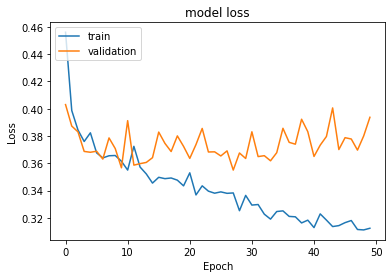

In [324]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* From the plot above, the model seems to still overfitted. Still a lot of noise

Best Threshold=0.148618, G-Mean=0.760


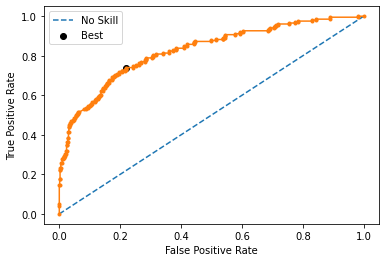

In [325]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat6 = estimator_v6.predict(X_test)
# keep probabilities for the positive outcome only
yhat6 = yhat6[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat6)
# calculate the g-mean for each threshold
gmeans6 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans6)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans6[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [326]:
y_pred_e6=estimator_v6.predict(X_test)
y_pred_e6 = (y_pred_e6 > thresholds5[ix])
y_pred_e6

array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [

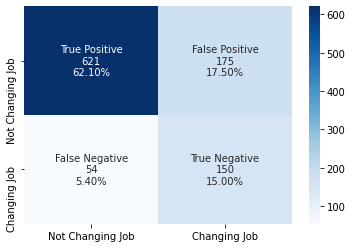

In [327]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm6=confusion_matrix(y_test, y_pred_e6)
labels = ['True Positive','False Positive','False Negative','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm6, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Model Performance Evaluation**

In [328]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e6)
print(cr6)

              precision    recall  f1-score   support

           0       0.92      0.78      0.84       796
           1       0.46      0.74      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.77      0.79      1000



* Here, Accuracy slightly increases.
* The recall score remains almost at the same level as in the previous model
* False Negative increases  slightly. Precision and F1 scores are also stable

### **Keras Tuner**

In [329]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

**Hyperparameters**
* How many hidden layers should the model have?
* How many neurons should the model have in each hidden layer?
* Learning Rate

In [330]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

- Initialize a tuner (here, RandomSearch). 
- We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.

In [331]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

INFO:tensorflow:Reloading Oracle from existing project .\Job_\oracle.json
INFO:tensorflow:Reloading Tuner from .\Job_\tuner0.json


In [332]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [333]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [334]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in .\Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8576719760894775
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8558201193809509
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8555555542310079
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.8460317651430765
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_

### **Model 7**

* Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [335]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [336]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [337]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1920      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,665
Trainable params: 121,665
Non-trai

In [338]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [339]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
79/79 [==============================] - 1s 4ms/step - loss: 0.4244 - accuracy: 0.8117 - val_loss: 0.3934 - val_accuracy: 0.8262
Epoch 2/50
79/79 [==============================] - 0s 3ms/step - loss: 0.3658 - accuracy: 0.8448 - val_loss: 0.3864 - val_accuracy: 0.8492
Epoch 3/50
79/79 [==============================] - 0s 3ms/step - loss: 0.3458 - accuracy: 0.8538 - val_loss: 0.4075 - val_accuracy: 0.8444
Epoch 4/50
79/79 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.8621 - val_loss: 0.3899 - val_accuracy: 0.8444
Epoch 5/50
79/79 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8623 - val_loss: 0.3807 - val_accuracy: 0.8476
Epoch 6/50
79/79 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.8690 - val_loss: 0.3816 - val_accuracy: 0.8468
Epoch 7/50
79/79 [==============================] - 0s 3ms/step - loss: 0.2970 - accuracy: 0.8714 - val_loss: 0.4339 - val_accuracy: 0.8190
Epoch 8/50
79/79 [==

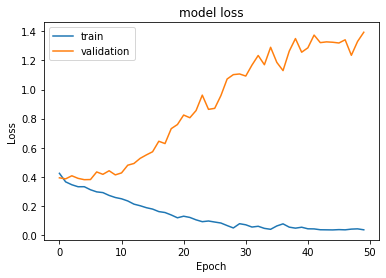

In [340]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that the distance between train and validation curves is huge.

Best Threshold=0.003416, G-Mean=0.708


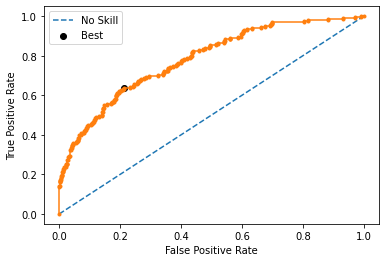

In [341]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [342]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

array([[False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

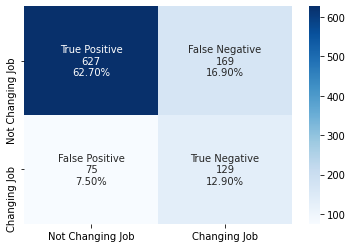

In [343]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Model Performance Evaluation**

In [344]:
#Accuracy as per the classification report 
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       796
           1       0.43      0.63      0.51       204

    accuracy                           0.76      1000
   macro avg       0.66      0.71      0.68      1000
weighted avg       0.80      0.76      0.77      1000



* Accuracy doesn’t move much but the proportion of False Negative is increasing. The recall varies downwards from the previous model, especially for predicting the Class 1.
* F1 and precision scores also go down.

* Let's try to apply SMOTE to balance this dataset and then apply hyperparamter tuning accordingly.

### **SMOTE + Keras Tuner**

In [345]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [346]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [347]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

INFO:tensorflow:Reloading Oracle from existing project .\Job_Switch\oracle.json
INFO:tensorflow:Reloading Tuner from .\Job_Switch\tuner0.json


In [348]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [349]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [350]:
tuner_2.results_summary()

Results summary
Results in .\Job_Switch
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 7
units_0: 32
units_1: 192
learning_rate: 0.001
units_2: 96
units_3: 160
units_4: 128
units_5: 32
units_6: 32
Score: 0.8147590359052023
Trial summary
Hyperparameters:
num_layers: 5
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 96
units_3: 32
units_4: 32
Score: 0.7451472679773966
Trial summary
Hyperparameters:
num_layers: 10
units_0: 128
units_1: 160
learning_rate: 0.01
units_2: 128
units_3: 64
units_4: 64
units_5: 128
units_6: 192
units_7: 32
units_8: 32
units_9: 32
Score: 0.7198795278867086
Trial summary
Hyperparameters:
num_layers: 3
units_0: 96
units_1: 96
learning_rate: 0.0001
units_2: 32
Score: 0.6887550155321757
Trial summary
Hyperparameters:
num_layers: 3
units_0: 64
units_1: 96
learning_rate: 0.0001
units_2: 96
units_3: 256
units_4: 160
units_5: 64
units_6: 128
Score: 0.6842369437217712


In [351]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [352]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [353]:
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1920      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,665
Trainable params: 121,665
Non-trai

In [354]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
125/125 [==============================] - 1s 4ms/step - loss: 0.4750 - accuracy: 0.7721 - val_loss: 0.4464 - val_accuracy: 0.7711
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.8121 - val_loss: 0.5503 - val_accuracy: 0.7108
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8306 - val_loss: 0.3076 - val_accuracy: 0.8710
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.3632 - accuracy: 0.8363 - val_loss: 0.4446 - val_accuracy: 0.7811
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.3448 - accuracy: 0.8449 - val_loss: 0.3807 - val_accuracy: 0.8117
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.3243 - accuracy: 0.8579 - val_loss: 0.4265 - val_accuracy: 0.8017
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.3091 - accuracy: 0.8667 - val_loss: 0.3462 - val_accuracy: 0.8494
Epoch 

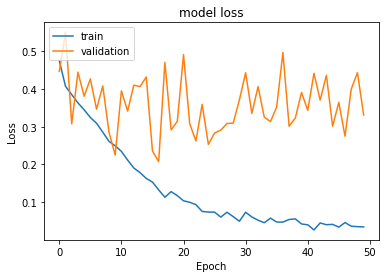

In [355]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* From the above plot, we observe that there is a lot of noise in the model.

Best Threshold=0.007387, G-Mean=0.716


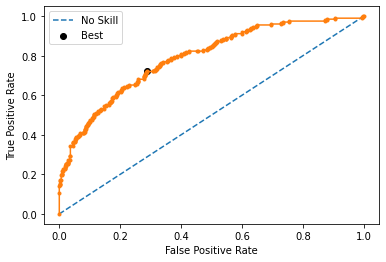

In [356]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [357]:
y_pred_e9=model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

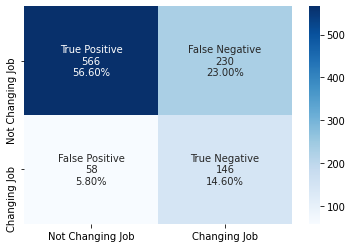

In [358]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm9, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Model Performance Evaluation**

In [359]:
#Accuracy as per the classification report 
from sklearn import metrics
cr9=metrics.classification_report(y_test,y_pred_e9)
print(cr9)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       796
           1       0.39      0.72      0.50       204

    accuracy                           0.71      1000
   macro avg       0.65      0.71      0.65      1000
weighted avg       0.80      0.71      0.74      1000



- This model 9 performs poorly. The recall performance collapses even though the number of False Negatives decreases.
- All the other metrics of this model are also low.
- This model has the lowest scores compared to the previous ones

Let's use Grid Search CV and see if we can increase the model's performance on the metrics.

In [360]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [361]:
def create_model_v7(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [362]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

In [363]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
79/79 [==============================] - 1s 4ms/step - loss: 0.4496 - accuracy: 0.7946 - val_loss: 0.3937 - val_accuracy: 0.8262


In [364]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.830794 using {'batch_size': 64, 'lr': 0.01}


In [365]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [366]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
125/125 [==============================] - 1s 4ms/step - loss: 0.5021 - accuracy: 0.7620 - val_loss: 0.5138 - val_accuracy: 0.6993
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7907 - val_loss: 0.5235 - val_accuracy: 0.6762
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.8006 - val_loss: 0.4773 - val_accuracy: 0.7385
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.7972 - val_loss: 0.5250 - val_accuracy: 0.7013
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.4342 - accuracy: 0.8046 - val_loss: 0.5740 - val_accuracy: 0.6772
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8040 - val_loss: 0.5884 - val_accuracy: 0.6888
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.8037 - val_loss: 0.4810 - val_accuracy: 0.6737
Epoch 

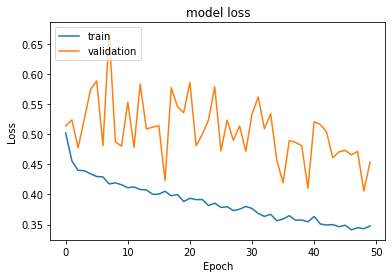

In [367]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the plot above, there is still a lot of noise in the data

Best Threshold=0.251803, G-Mean=0.757


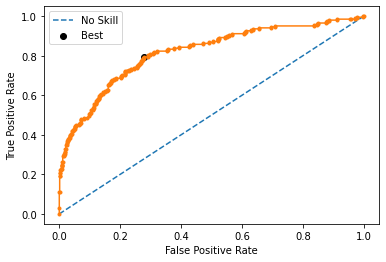

In [368]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [369]:
y_pred_e10=estimator_v7.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

array([[ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [

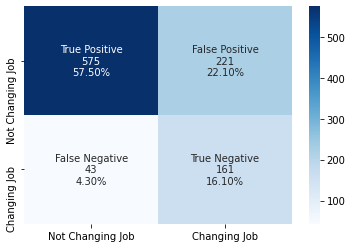

In [370]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_e10)
labels = ['True Positive','False Positive','False Negative','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm10, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Model Performance Evaluation**

In [371]:
#Accuracy as per the classification report 
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       796
           1       0.42      0.79      0.55       204

    accuracy                           0.74      1000
   macro avg       0.68      0.76      0.68      1000
weighted avg       0.83      0.74      0.76      1000



- Here, the False Negatives rate is the lowest compared to all the previous models
- However, the recall, precision, F1 scores as well as accuracy improved just slightly compared to the model 9 above.
- Oversampling using SMOTE did not help improve recall performance

# **6) Conclusion and key takeaways**

## **Business recommendations**

- In this dataset, the SMOTE oversampling, Keras Tuner, Dask with GridSearchCV, hyperparameters using GridSearchCV, dropout regularization and batch normalization techniques do not work well, as the models we tried building have overfitted on the training dataset
- So, our final model here can be **Model 5**, which uses the regularization with hyperparameters using RandomSearchCV technique and works on the imbalanced dataset

- The Management of the bank can deploy the model 5 to identify with a reasonable degree of accuracy and recall whether an bank's customer is likely to leave and join another service provider or not, and this process seems to be easier and more time-efficient than other methods.

- To understand which aspects of the service influence a customer's decision, an additional Machine Learning model can be built and used to get the feature importance of the variables that affect customer's decisions.

- The Marketing Department of the bank should consider adapting the bank’s services to better meet the expectations of older clients.

- The services offered by the bank must meet the local cultural requirements of the countries in which it is located. Attrition level is not evenly distributed by country.

- Since the attrition rate of female clients is higher than that of male clients, a collection of information from female clients should be organised to ascertain their feelings and expectations of the bank.